In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [2]:
def easom(x,y):
    return -(np.cos(x)*np.cos(y))*np.exp(-(x-np.pi)**2-(y-np.pi)**2)

def easom_grad(x,y):
    return np.array([-(-2*x+2*np.pi)*np.exp(-(x-np.pi)**2-(y-np.pi)**2)*np.cos(x)*np.cos(y)+np.exp(-(x-np.pi)**2-(y-np.pi)**2)*np.sin(x)*np.cos(y),
                    -(-2*y+2*np.pi)*np.exp(-(x-np.pi)**2-(y-np.pi)**2)*np.cos(x)*np.cos(y)+np.exp(-(x-np.pi)**2-(y-np.pi)**2)*np.sin(y)*np.cos(x)])

easom_limits = (0, 6)
easom_optim = (np.pi, np.pi)
easom_init = (2, 2)

In [3]:
n_iterations = 100
my_fun = easom
my_grad = easom_grad
my_limits = easom_limits
my_init = easom_init
my_optim = easom_optim

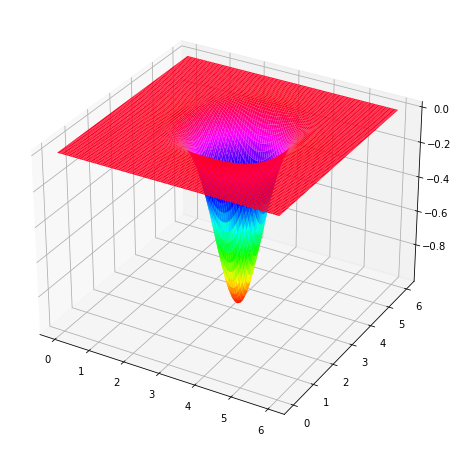

In [4]:
from random import seed
seed=1.0
plt.figure(figsize=(12,8))
x = np.linspace(my_limits[0], my_limits[1], 100)
X, Y = np.meshgrid(x, x)
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, my_fun(X, Y), rstride=1, cstride=1, cmap='hsv')
plt.show()

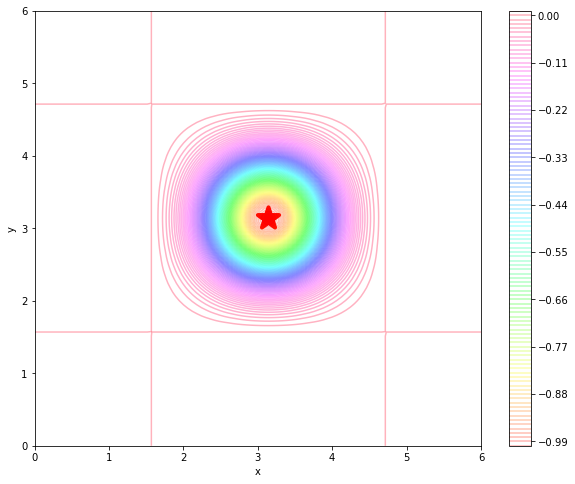

In [5]:
plt.figure(figsize=(10,8))
plt.contour(X,Y, my_fun(X,Y), 100, alpha=.3, cmap='hsv')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(my_optim[0], my_optim[1], marker='*', s=500, color='red', linewidth=4);

In [6]:
method = []
parametrs = []
countofsteps = []
trajs = []

seed=1

## Simulated Annealing

In [7]:
def annealing(fun, init, n_iterations, t0, q, step_size):
    traj = [np.array(init)]
    t = t0
    for k in range(n_iterations):
        x = traj[-1]
        proposal = np.random.normal(loc=x, scale=step_size)
        log_alpha = (fun(x[0], x[1]) - fun(proposal[0], proposal[1]))/t
        if np.log(np.random.random()) < log_alpha:
            x = proposal
        traj.append(x)
        t *= q
        dist=distance.euclidean(easom_optim,(abs(x[0]),abs(x[1])))
        if dist<0.2:
            min_steps=k+1
            break
        else:
            min_steps=n_iterations
        
    return np.array(traj).T, min_steps, dist

In [8]:
#перебор по сетке
tt0=np.arange(0.1,1,0.1)
qq=[0.1,0.5,0.7,0.8,0.9]
sz=[0.1,0.2,0.3,0.4,0.5,1,2,5]
steps = 1000
euclid_dist = 100


for t0 in tt0:
    for q in qq:
        for step_size in sz:
            traj, min_steps, dist = annealing(my_fun, my_init, n_iterations, t0, q, step_size)
            if min_steps < steps or (min_steps == steps and dist < euclid_dist):
                steps = min_steps
                euclid_dist = dist
                best_traj = traj
                params = f'{t0=}, {q=}, {step_size=}'
parametrs.append(params)
method.append('Simulated Annealing')
countofsteps.append(steps)
trajs.append(best_traj)

## Gradient Descent

In [9]:
def gradientDescent(fun, grad_fun, init, n_iterations, eta):
    traj = [np.array(init)]
    for k in range(n_iterations):
        x = traj[-1]
        x = x - eta * grad_fun(x[0], x[1])
        traj.append(x)
        dist=distance.euclidean(easom_optim,(abs(x[0]),abs(x[1])))
        if dist<0.2:
            min_steps=k+1
            break
        else:
            min_steps=n_iterations
        
    return np.array(traj).T, min_steps, dist

In [10]:
#перебор по сетке
etaa=np.arange(0.01,0.03,0.001)
steps = 1000
euclid_dist = 100

for eta in etaa:
            traj, min_steps, dist = gradientDescent(my_fun,my_grad, my_init, n_iterations, eta=eta)
            if min_steps < steps or (min_steps == steps and dist < euclid_dist):
                steps = min_steps
                euclid_dist = dist
                best_traj = traj
                params = f'{eta=}'
parametrs.append(params)
method.append('Gradient Descent')
countofsteps.append(steps)
trajs.append(best_traj)

#### Momentum Optimization

In [11]:
def gradientDescentM(fun, grad_fun, init, n_iterations, eta,beta):
    traj = [np.array(init)]
    v=0.0
    for k in range(n_iterations):
        x = traj[-1]
        v = beta*v-eta *grad_fun(x[0], x[1])
        x = x + v
        traj.append(x)
        dist=distance.euclidean(easom_optim,(abs(x[0]),abs(x[1])))
        if dist<0.2:
            min_steps=k+1
            break
        else:
            min_steps=n_iterations
        
    return np.array(traj).T, min_steps, dist

In [12]:
etaa=np.arange(0.001,0.1,0.001)
betaa=[0.9,0.95]
steps = 1000
euclid_dist = 100

for era in etaa:
    for beta in betaa:
            traj, min_steps, dist = gradientDescentM(my_fun,my_grad, my_init, n_iterations, eta=eta,beta=beta)
            if min_steps < steps or (min_steps == steps and dist < euclid_dist):
                steps = min_steps
                euclid_dist = dist
                best_traj = traj
                params = f'{eta=}, {beta=}'
parametrs.append(params)
method.append('Momentum')
countofsteps.append(steps)
trajs.append(best_traj)

### Nesterov Optimization

In [13]:
def gradientDescentNesterov(fun, grad_fun, init, n_iterations, eta,beta):
    traj = [np.array(init)]
    v=np.array([0,0])
    for k in range(n_iterations):
        x = traj[-1]
        v = beta*v-eta *grad_fun(x[0]+beta*v[0], x[1]+beta*v[1])
        x = x + v
        traj.append(x)
        dist=distance.euclidean(easom_optim,(abs(x[0]),abs(x[1])))
        if dist<0.2:
            min_steps=k+1
            break
        else:
            min_steps=n_iterations
        
    return np.array(traj).T, min_steps, dist

In [14]:
etaa=np.arange(0.001,0.1,0.001)
betaa=[0.9,0.95]
steps = 1000
euclid_dist = 100

for eta in etaa:
    for beta in betaa:
            traj, min_steps, dist = gradientDescentNesterov(my_fun,my_grad, my_init, n_iterations, eta=eta,beta=beta)
            if min_steps < steps or (min_steps == steps and dist < euclid_dist):
                steps = min_steps
                euclid_dist = dist
                best_traj = traj
                params = f'{eta=}, {beta=}'
parametrs.append(params)
method.append('gradientDescentNesterov')
countofsteps.append(steps)
trajs.append(best_traj)

## Adagrad

In [15]:
def adagrad(fun, grad_fun, init, n_iterations, eta, eps):
    traj = [np.array(init)]
    s = 0
    for k in range(n_iterations):
        x = traj[-1]
        grad = grad_fun(x[0], x[1])
        s += grad**2
        x = x - eta / np.sqrt(s + eps) * grad_fun(x[0], x[1])
        traj.append(x)
        dist=distance.euclidean(easom_optim,(abs(x[0]),abs(x[1])))
        if dist<0.2:
            min_steps=k+1
            break
        else:
            min_steps=n_iterations
        
    return np.array(traj).T, min_steps, dist


In [16]:
etaa=np.arange(0.1,1,0.01)
epss=[0.01,0.001,0.0001,0.00001,0.000001,0.0000001]
steps = 1000
euclid_dist = 100

for eta in etaa:
    for eps in epss:
            traj, min_steps, dist = adagrad(my_fun,my_grad, my_init, n_iterations, eta=eta,eps=eps)
            if min_steps < steps or (min_steps == steps and dist < euclid_dist):
                steps = min_steps
                euclid_dist = dist
                best_traj = traj
                params = f'{eta=}, {beta=}'
parametrs.append(params)
method.append('adagrad')
countofsteps.append(steps)
trajs.append(best_traj)

## RMSProp

In [17]:
def RMSProp(fun, grad_fun, init, n_iterations, eta, rho, eps):
    traj = [np.array(init)]
    s = 0
    for k in range(n_iterations):
        x = traj[-1]
        s = rho * s + (1-rho)*  (grad_fun(x[0], x[1]))**2
        x = x - eta / np.sqrt(s + eps) * grad_fun(x[0], x[1])
        traj.append(x)
        dist=distance.euclidean(easom_optim,(abs(x[0]),abs(x[1])))
        if dist<0.2:
            min_steps=k+1
            break
        else:
            min_steps=n_iterations
        
    return np.array(traj).T, min_steps, dist

In [18]:
etaa=np.arange(0.01,0.1,0.01)
epss=[0.01,0.001,0.0001,0.00001,0.000001,0.0000001]
rhoo = [0.9, 0.95,0.99]
steps = 1000
euclid_dist = 100

for eta in etaa:
    for rho in rhoo:
        for eps in epss:
            traj, min_steps, dist = RMSProp(my_fun, my_grad, my_init, n_iterations, eta = eta, rho = rho, eps = eps)
            if min_steps < steps or (min_steps == steps and dist < euclid_dist):
                steps = min_steps
                euclid_dist = dist
                best_traj = traj
                params = f'{eta=}, {rho=}, {eps=}'
    
parametrs.append(params)
method.append('RMSProp')
countofsteps.append(steps)
trajs.append(best_traj)

## Adadelta

In [19]:
def adadelta(fun, grad_fun, init, n_iterations, rho, eps):
    traj = [np.array(init)]
    s = 0
    d = 0
    for k in range(n_iterations):
        x = traj[-1]
        s = rho * s + (1-rho)* (grad_fun(x[0], x[1]))**2
        d=rho*d+(1-rho)*(grad_fun(x[0], x[1]))**2
        x = x - np.sqrt(d + eps) * (grad_fun(x[0], x[1])) /  np.sqrt(s + eps) 
        traj.append(x)
        dist=distance.euclidean(easom_optim,(abs(x[0]),abs(x[1])))
        if dist<0.2:
            min_steps=k+1
            break
        else:
            min_steps=n_iterations
        
    return np.array(traj).T, min_steps, dist

In [20]:
rhoo = [0.9, 0.95,0.99]
epss=[0.01,0.001,0.0001,0.00001,0.000001,0.0000001]
steps = 1000
euclid_dist = 100

for rho in rhoo:
    for eps in epss:
        traj, min_steps, dist = adadelta(my_fun, my_grad, my_init, n_iterations, rho = rho, eps = eps)
        if min_steps < steps or (min_steps == steps and dist < euclid_dist):
            steps = min_steps
            euclid_dist = dist
            best_traj = traj
            params = f'{rho=}, {eps=}'
    
parametrs.append(params)
method.append('adadelta')
countofsteps.append(steps)
trajs.append(best_traj)

In [21]:
def adam(fun, grad_fun, init, n_iterations, eta, eps,beta1,beta2):
    traj = [np.array(init)]
    s = 0
    v = 0
    for k in range(n_iterations):
        x = traj[-1]
        v=beta1*v+(1-beta1)*grad_fun(x[0], x[1])  
        s=beta2*s+(1-beta2)*(grad_fun(x[0], x[1]))**2
        vk=v/(1-beta1**(k+1)) #домножаем, т к период один 
        sk=s/(1-beta2**(k+1))
        x = x - eta*vk/(np.sqrt(sk+eps))
        traj.append(x)
        dist=distance.euclidean(easom_optim,(abs(x[0]),abs(x[1])))
        if dist<0.2:
            min_steps=k+1
            break
        else:
            min_steps=n_iterations
        
    return np.array(traj).T, min_steps, dist

In [22]:
etaa=np.arange(0.001,0.02,0.001)
epss=[0.01,0.001,0.0001,0.00001,0.000001,0.0000001]
bbeta1 = [0.9, 0.95,0.99]
bbeta2 = [0.9, 0.95,0.99]
steps = 1000
euclid_dist = 100

for eta in etaa:
    for eps in epss:
        for beta1 in bbeta1:
            for beta2 in bbeta2:
                traj, min_steps, dist = adam(my_fun, my_grad, my_init, n_iterations, eta, eps,beta1,beta2)
                if min_steps < steps or (min_steps == steps and dist < euclid_dist):
                    steps = min_steps
                    euclid_dist = dist
                    best_traj = traj
                    params = f'{eta=}, {eps=},{beta1=},{beta2=}'
    
parametrs.append(params)
method.append('adam')
countofsteps.append(steps)
trajs.append(best_traj)

In [23]:
dict1 = {'method': method, 'parametrs': parametrs, 'steps': countofsteps}
df = pd.DataFrame(dict1)
df

,method,parametrs,steps
0,Simulated Annealing,"t0=0.5, q=0.1, step_size=1",5
1,Gradient Descent,eta=0.028999999999999984,100
2,Momentum,"eta=0.028999999999999984, beta=0.95",26
3,gradientDescentNesterov,"eta=0.099, beta=0.95",12
4,adagrad,"eta=0.6099999999999998, beta=0.95",2
5,RMSProp,"eta=0.060000000000000005, rho=0.99, eps=1e-05",2
6,adadelta,"rho=0.9, eps=0.01",5
7,adam,"eta=0.019000000000000003, eps=1e-07,beta1=0.9,...",46


In [24]:
dict2 = {'method': method, 'best_trajs': trajs}

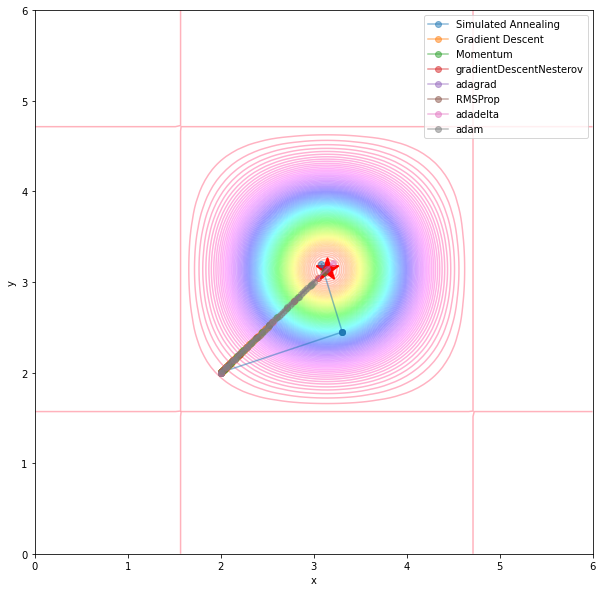

In [25]:
plt.figure(figsize=(10,10))
plt.contour(X, Y, my_fun(X,Y), 100, alpha=.3, cmap='hsv')
plt.scatter(my_optim[0], my_optim[1], marker='*', s=500, color='red', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
for i in range(len(dict1['method'])):
    plt.plot(dict2['best_trajs'][i][0], dict2['best_trajs'][i][1], marker='o', alpha=.5,
        label=dict2['method'][i])
plt.legend()